Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](http://archive.is/Nu3EI), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/category_encoders/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/category_encoders/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](https://contrib.scikit-learn.org/category_encoders/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](https://contrib.scikit-learn.org/category_encoders/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](https://contrib.scikit-learn.org/category_encoders/catboost.html)
- [Generalized Linear Mixed Model Encoder](https://contrib.scikit-learn.org/category_encoders/glmm.html)
- [James-Stein Encoder](https://contrib.scikit-learn.org/category_encoders/jamesstein.html)
- [Leave One Out](https://contrib.scikit-learn.org/category_encoders/leaveoneout.html)
- [M-estimate](https://contrib.scikit-learn.org/category_encoders/mestimate.html)
- [Target Encoder](https://contrib.scikit-learn.org/category_encoders/targetencoder.html)
- [Weight of Evidence](https://contrib.scikit-learn.org/category_encoders/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/colinmorris/embedding-layers)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation — maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = 'Desktop/Lambda/Unit 2/Sprint 2/data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv('/Users/micahswain/Desktop/Lambda/Unit 2/Sprint 2/data/train_features.csv'), 
                 pd.read_csv('/Users/micahswain/Desktop/Lambda/Unit 2/Sprint 2/data/train_labels.csv'))
test = pd.read_csv('/Users/micahswain/Desktop/Lambda/Unit 2/Sprint 2/data/test_features.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
df = train

df.set_index('id', inplace=True)

df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
import numpy as np

def wrangle(X):
  # Make a copy
  X = X.copy()

   #breakup recorced date feature
  
  X['date_recorded'] = pd.to_datetime(X.date_recorded)

  X['date_recorded_year'] = X['date_recorded'].dt.year
  X['date_recorded_month'] = X['date_recorded'].dt.month
  X['date_recorded_week'] = X['date_recorded'].dt.week
  X['date_recorded_day'] = X['date_recorded'].dt.day
  X['date_recorded_dayofweek'] = X['date_recorded'].dt.dayofweek
  X['date_recorded_value'] = pd.to_numeric(X.date_recorded)
  

  X.drop(columns = ['date_recorded'], inplace=True, errors='ignore')  

  # Drop high cardinality cols
  high_card_cols = [col for col in X.select_dtypes('object').columns
                     if X[col].nunique() > 100]

  X.drop(columns=high_card_cols, inplace=True)

  # Drop repeated columns
  cols = ['extraction_type_group', 'quantity', 'num_private', 'recorded_by']
  X.drop(columns=cols, inplace=True, errors='ignore')

  # Change 0 to NAN

  X['amount_tsh'].replace(0, np.nan, inplace=True)
  X['construction_year'].replace(0, np.nan, inplace=True)
  X['gps_height'].replace(0, np.nan, inplace=True)
  X['longitude'].replace(0, np.nan, inplace=True)
  X['latitude'].replace(-2.000000e-08, np.nan, inplace=True)
  X['population'].replace(0, np.nan, inplace=True)

  X['years_in_use'] = X['date_recorded_year'] - X['construction_year']

 

  return X

In [5]:
df = wrangle(df)

df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,population,public_meeting,...,waterpoint_type,waterpoint_type_group,status_group,date_recorded_year,date_recorded_month,date_recorded_week,date_recorded_day,date_recorded_dayofweek,date_recorded_value,years_in_use
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390.0,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,109.0,True,...,communal standpipe,communal standpipe,functional,2011,3,11,14,0,1300060800000000000,12.0
8776,NaN,1399.0,34.698766,-2.147466,Lake Victoria,Mara,20,2,280.0,NaN,...,communal standpipe,communal standpipe,functional,2013,3,10,6,2,1362528000000000000,3.0
34310,25.0,686.0,37.460664,-3.821329,Pangani,Manyara,21,4,250.0,True,...,communal standpipe multiple,communal standpipe,functional,2013,2,9,25,0,1361750400000000000,4.0
67743,NaN,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,58.0,True,...,communal standpipe multiple,communal standpipe,non functional,2013,1,5,28,0,1359331200000000000,27.0
19728,NaN,NaN,31.130847,-1.825359,Lake Victoria,Kagera,18,1,NaN,True,...,communal standpipe,communal standpipe,functional,2011,7,28,13,2,1310515200000000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,1210.0,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,125.0,True,...,communal standpipe,communal standpipe,functional,2013,5,18,3,4,1367539200000000000,14.0
27263,4700.0,1212.0,35.249991,-9.070629,Rufiji,Iringa,11,4,56.0,True,...,communal standpipe,communal standpipe,functional,2011,5,18,7,5,1304726400000000000,15.0
37057,NaN,NaN,34.017087,-8.750434,Rufiji,Mbeya,12,7,NaN,True,...,hand pump,hand pump,functional,2011,4,15,11,0,1302480000000000000,NaN


#Split Data

In [6]:
target = 'status_group'
y=df[target]
X=df.drop(columns=target)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=1)

#Establish Baseline

In [8]:
baseline_acc = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5434132996632997


#Build Model

In [9]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

In [10]:
forest_model = make_pipeline(OrdinalEncoder(),
                             SimpleImputer(),
                             RandomForestClassifier()
                )

forest_model.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity_group',
                                      'source', 'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoint_type_group'],
                                map...
                                          'mapping': hand pump                      1
communal standpipe             2
communal standpipe multiple    3
other                          4
improved spring                5
cattle trough    

In [11]:
print('FOREST: Training Accuracy:', forest_model.score(X_train, y_train))
print('FOREST: Validation Accuracy:', forest_model.score(X_val, y_val))

FOREST: Training Accuracy: 0.9977483164983165
FOREST: Validation Accuracy: 0.8082491582491582


In [12]:
test.set_index('id', inplace=True)

X_test = wrangle(test)

y_pred_forest = forest_model.predict(X_test)

submission = pd.DataFrame(y_pred_forest, columns=['status_group'], index=X_test.index)

submission

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,status_group
id,
50785,non functional
51630,functional
17168,functional
45559,non functional
49871,functional
...,...
39307,non functional
18990,functional
28749,functional


In [13]:
submission.to_csv('2020-10-06_#2_submission.csv')

Text(0.5, 0, 'Information Gain')

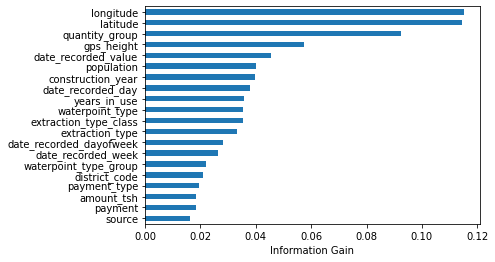

In [15]:
import matplotlib.pyplot as plt

features = X_train.columns
importances = forest_model.named_steps['randomforestclassifier'].feature_importances_

feature_importances = pd.Series(importances, index=features).sort_values()

feature_importances.tail(20).plot(kind='barh')
plt.xlabel('Information Gain')